In [2]:
import numpy as np
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# 탑승 순서 S -> C-> Q
# 동행 가족 (SibSp + Parch 를 더하고 내린 평균) 
titanic['family'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.head()
df1 = titanic[['Embarked', 'Pclass', 'Survived', 'family']]
df1.groupby(['Pclass', 'Embarked']).mean()

Survived    family
Pclass Embarked                    
1      C         0.694118  1.694118
       Q         0.500000  2.500000
       S         0.582677  1.826772
2      C         0.529412  2.117647
       Q         0.666667  1.000000
       S         0.463415  1.762195
3      C         0.378788  1.727273
       Q         0.375000  1.597222
       S         0.189802  2.144476

In [11]:
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  family  
0      0         A/5 21171   7.2500   NaN        S       1  
1      0          PC 17599  71.2833   C85        C       1  
2      0  STON/O2. 3101282   7.9250   NaN        S       0

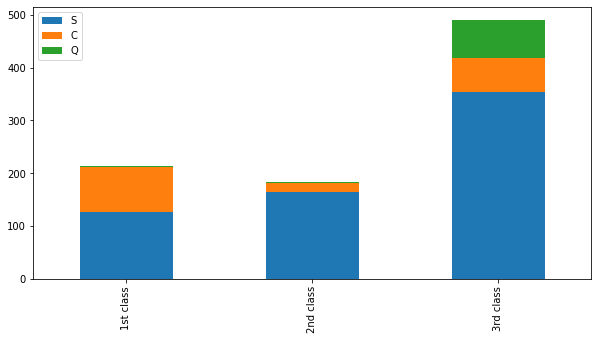

In [8]:
# 항구별로 승선하는 Pclass 등급비율

Pclass1 = titanic[titanic['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = titanic[titanic['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = titanic[titanic['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

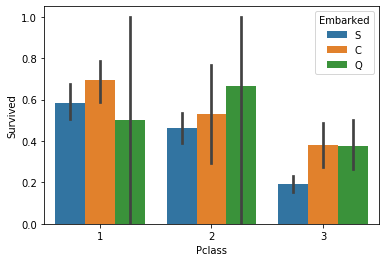

In [9]:
import seaborn as sns
sns.barplot(
    data = df1,
    x = "Pclass",
    y = "Survived",
    hue = "Embarked"
)

# Pclass 가 3등급인 사람들은 1, 2 등급 보다 생존률이 현저히 낮음, 타이타닉의 탑승순서는 S → C → Q 
# 그 중에서도 제일 먼저 탑승한 S-사우스햄튼에서 탄 3등급 객실이 사람들의 생존율이 0.18 이었음.
